In [1]:
! pip install -U spacy

In [2]:
! pip install gensim

In [3]:
! pip install wordcloud

In [4]:
! python3 -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 7.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [5]:
! pip install emoji

In [6]:
import pandas as pd
import numpy as np
import re
import spacy
import gensim
import en_core_web_sm
import emoji
import nltk
import matplotlib.pyplot as plt 

In [7]:
from spacy.tokenizer import Tokenizer
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from optparse import Values

### Cleaning Data

In [8]:
df = pd.read_csv("python_api_use.csv")

In [9]:
df.columns

Index(['created_at', 'lang', 'author_id', 'text', 'id'], dtype='object')

Replace all empty value into NA

In [10]:
df = df.replace(r'^\s*$', np.nan, regex=True)

Get unique data

In [11]:
df['id'] = df['id'].unique()

Removing emoji from text column

In [12]:
def emoji_remove(text):
    emoji_list = [c for c in text if emoji.is_emoji(c)]
    clean_text = ' '.join([str for str in text.split() if not any(i in str for i in emoji_list)])
    return clean_text


call_emoji_free = lambda x: emoji_remove(x)

df['text'] = df['text'].apply(call_emoji_free)

Cleaning url from the text

In [13]:
def url_remove(text):
    text = re.sub(r'http\S+', '', text)
    return text

#apply url moving function
df['text'] = df['text'].apply(url_remove)

Custom stopwords and use it with cleaning data process

In [14]:
nlp = spacy.load('en_core_web_sm')
tokenizer = Tokenizer(nlp.vocab)
custom_stopwords = ['hi','\n','\n\n', '&amp;', ' ', '.', '-', "it's", 'it’s', "i'm", 'i’m', 'im', 'want', 'like', '$', '@', 'rt', 'RT']
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords)
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)


Tokenize text column and create a new column with tokenized data

In [15]:
tokens = []

for doc in tokenizer.pipe(df['text'], batch_size=500):
    doc_tokens = []    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())   
    tokens.append(doc_tokens)

# Makes tokens column
df['text_token'] = tokens

In [16]:
df['text_token']

0     [pressure, mounting, asset, owners, tackle, im...
1     [@dvdmckay:, we’ve, got, new, paper, climate, ...
2     [@deathball13:, let's, forget, good, old, #cha...
3     [@energylivenews:, prime, minister, liz, truss...
4     [@energyhouseva:, energy, crisis, short-lived,...
                            ...                        
95    [@unfpa_arabic:, supporting, women, girls, add...
96    [@trudeaus_ego:, afternoon,, cabinet, meeting,...
97    [#climatechange, #globalwarming, #climateemerg...
98    [#climatestrike, #savetheplanet, #savethetrees...
99    [@warrenswil:, #potus, signs, huge, new, #clim...
Name: text_token, Length: 100, dtype: object

Countvectorizer of data, text_token dataframe column

In [17]:
vec = CountVectorizer(lowercase=False)
feature = vec.fit_transform(df)
feature_arr = feature.toarray()
countvec_df = pd.DataFrame(data=feature_arr, columns=vec.get_feature_names())

countvec_df.head()

,author_id,created_at,id,lang,text,text_token
0,0,1,0,0,0,0
1,0,0,0,1,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,1,0,0,0


In [18]:
df.head()

,created_at,lang,author_id,text,id,text_token
0,2022-09-09T23:59:41.000Z,en,78429986,The pressure is mounting for asset owners to t...,1568388706762981378,"[pressure, mounting, asset, owners, tackle, im..."
1,2022-09-09T23:59:21.000Z,en,1515895379329708032,RT @dvdmckay: We’ve got a new paper out on cli...,1568388623288107008,"[@dvdmckay:, we’ve, got, new, paper, climate, ..."
2,2022-09-09T23:59:16.000Z,en,1547977583714660355,RT @DEATHBALL13: Let's not forget good old #Ch...,1568388601926524928,"[@deathball13:, let's, forget, good, old, #cha..."
3,2022-09-09T23:58:51.000Z,en,1302354043793223680,RT @EnergyLiveNews: Prime Minister Liz Truss a...,1568388497152638978,"[@energylivenews:, prime, minister, liz, truss..."
4,2022-09-09T23:58:45.000Z,en,126075164,RT @EnergyHouseVA: Energy Crisis Will Be Short...,1568388472695853056,"[@energyhouseva:, energy, crisis, short-lived,..."


### EDA

Basic Statistics of Dataframe with numerical and categorical columns

In [19]:
df.describe()

,author_id,id
count,1.000000e+02,1.000000e+02
mean,5.274723e+17,1.568386e+18
std,6.423821e+17,1.936307e+12
min,4.937061e+06,1.568382e+18
25%,2.847525e+08,1.568384e+18
50%,2.632831e+09,1.568386e+18
75%,1.141385e+18,1.568387e+18
max,1.564634e+18,1.568389e+18


In [20]:
df[['text' ,'text_token']].describe()

,text,text_token
count,100,100
unique,69,68
top,RT @anncherie49: #Fauziah just referred to #Cl...,"[@anncherie49:, #fauziah, referred, #climatech..."
freq,14,14


Display a wordcloud of cleaned text content

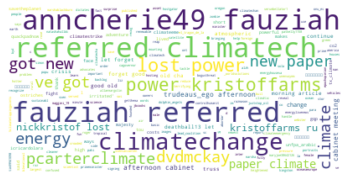

In [21]:
text=df['text_token']
text=text.to_string()
wordcloud_content = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud_content, interpolation="bilinear")
plt.axis("off")
plt.show()

Display a wordcloud of cleaned text content (positive words)

In [22]:
#find positive word
with open("positive-words.txt",'r') as f:
    positive_words=[line.strip() for line in f]

negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']

text_positive=df['text_token']

positive_tokens=[]
for idx, l in enumerate(text_positive):
    for token in l:
        if token in positive_words:
            if idx>0:
                if text_positive[idx-1] not in negations:
                    positive_tokens.append(token)
            else:
                positive_tokens.append(token)

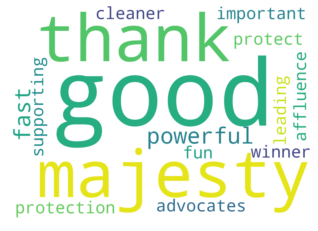

In [23]:
#Display a wordcloud of positive words
text=positive_tokens
text=" ".join(str(x) for x in text)
wordcloud_content = WordCloud(stopwords=stopwords, background_color="white", max_words=100, width=3500, height=2500).generate(text)

plt.figure()
plt.imshow(wordcloud_content, interpolation="bilinear")
plt.axis("off")
plt.show()

Display a wordcloud of cleaned text content (Negative words)

In [24]:
with open("negative-words.txt",'r') as f:
    negative_words=[line.strip() for line in f]

negations=['not', 'too', 'n\'t', 'no', 'cannot', 'neither','nor']

text_negative=df['text_token']

negative_tokens=[]
for idx, l in enumerate(text_negative):
    for token in l:
        if token in negative_words:
            if idx>0:
                if text_negative[idx-1] not in negations:
                    negative_tokens.append(token)
            else:
                negative_tokens.append(token)


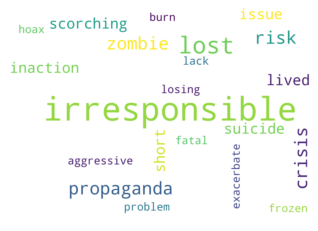

In [25]:
#Display a wordcloud of negative words
text=negative_tokens
text=" ".join(str(x) for x in text)
wordcloud_content = WordCloud(stopwords=stopwords, background_color="white", max_words=150, width=3500, height=2500).generate(text)

plt.figure()
plt.imshow(wordcloud_content, interpolation="bilinear")
plt.axis("off")
plt.show()

Bar plot to compare negative and positive words

In [26]:
positive_fd = nltk.FreqDist(positive_tokens)
negative_fd = nltk.FreqDist(negative_tokens)

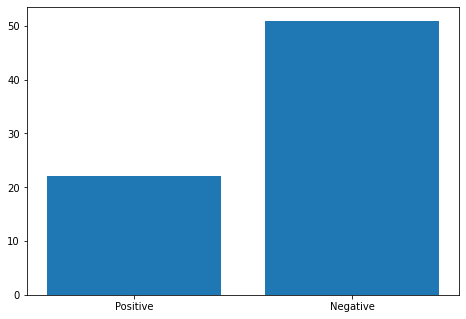

In [27]:
#bar plot show the comparison of number of positive words and negative words
count_positive=len(positive_tokens)
count_negative=len(negative_tokens)
df_Positive = pd.DataFrame(positive_tokens,columns=['Positive'])
df_Negative = pd.DataFrame(negative_tokens, columns=['Negative'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Positive', 'Negative']
students = [count_positive,count_negative]
ax.bar(langs,students)
plt.show()

Find out which lang used the most with visualization

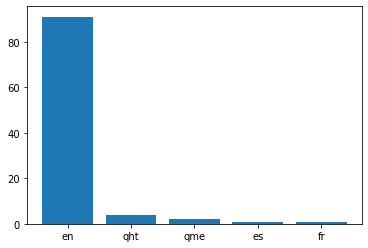

In [28]:
lang_var = df['lang']
freq = Counter(lang_var)
freq_top5 = freq.most_common(5)

keys = []
values = []
for i in freq_top5:
    keys.append(i[0])
    values.append(i[1])

plt.bar(keys, values)
plt.show()

In [29]:
df.to_csv('cleaned_py.csv')